# DEEP SEA CORALS PROJECT
***

# Goal
***

The goal of this project is to draw insights about the corals and the means by which the information about them was gathered.

# Acquire
Acquiring the data from local csv file
***

In [1]:
# establishing environment
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing data
df = pd.read_csv('deep_sea_corals.csv')

In [3]:
# previewing data
df.head()

,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,959.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28
2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,953.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53
3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09
4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50


# Prepare
Preparing the data for exploration and modeling
***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513373 entries, 0 to 513372
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CatalogNumber            513372 non-null  float64
 1   DataProvider             513372 non-null  object 
 2   ScientificName           513372 non-null  object 
 3   VernacularNameCategory   513197 non-null  object 
 4   TaxonRank                513364 non-null  object 
 5   Station                  253590 non-null  object 
 6   ObservationDate          513367 non-null  object 
 7   latitude                 513373 non-null  object 
 8   longitude                513373 non-null  object 
 9   DepthInMeters            513372 non-null  float64
 10  DepthMethod              496845 non-null  object 
 11  Locality                 389645 non-null  object 
 12  LocationAccuracy         484662 non-null  object 
 13  SurveyID                 306228 non-null  object 
 14  Repo

- Drop columns that will not be used in this iteration of the project
    - CatalogNumber, SampleID, SurveyID, EventID, and Station
        - Categorical columns with vast amounts of unique values that don't offer insight to anything within the scope of this project
    - Locality
        - Column holds a very large amount of categorical values
        - Will be easier to work with if I bin the values as many appear to be near eachother but I'll save this for a later iteration of the project since it may take a significant amount of time

     
     
- Many null values
    - I'll drop them after dropping columns I don't plan to use for this first iteration of this project
        - If too many rows are lost I'll impute values to preserve more rows 


- Convert ObservationDate column to datetime 
        
        
- Other data types look okay for now but I'll update if needed to facilitate operations



- Rename columns 
    - all lowercase
    - "_" between words in names


- Make all values lowercase where applicable


- Edit: DepthInMeters has a negative value in 23 rows.
    - All had a value of -999
    - I'm not certain but I suspect that this value was used instead of null
    - I'm going to drop these rows as well
    
- Edit: There are rows that contain data about sponges and other non-coral creatures
    - Removing all non-coral creatures from data

### Dropping Columns

In [5]:
# dropping specified columns
df = df.drop(columns = ['CatalogNumber', 'SampleID', 'SurveyID', 'EventID', 'Station', 'Locality'])

### Dropping Nulls

In [6]:
# dropping all null values
df = df.dropna()

### Converting Observation_Date to datetime

In [7]:
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

### Renaming Columns

In [8]:
# adding underscores to various column names
df.columns = ['Data_Provider', 'Scientific_Name', 'Vernacular_Name_Category', 'Taxon_Rank',
              'Observation_Date', 'latitude', 'longitude', 'Depth_Meters','Depth_Method', 
              'Location_Accuracy', 'Repository', 'Identification_Qualifier', 'Sampling_Equipment',
              'Record_Type']

# lower casing all column names
df.columns = df.columns.str.lower()

### Converting all values to lower case

In [9]:
df = df.applymap(lambda string:string.lower() if type(string) == str else string)

### Dropping rows with negative depth_meters value

In [10]:
df = df[df.depth_meters >= 0]

### Removing non-coral creatures from data

In [11]:
df = df[df.vernacular_name_category.str.contains('coral') & (df.vernacular_name_category.str.contains('hydrozoan') == False)]

# Explore
Exploring the data to draw insights about the corals and the means by which the information about them was gathered.
***

In [12]:
# creating function that converts latitude and longitude values into points for geopandas map
def df_to_gdf(df):
    coordinates = df[['latitude', 'longitude']].astype(float).values
    coordinates = pd.DataFrame(data = coordinates)
    coordinates.columns = ['latitude', 'longitude']
    coordinates = [Point(xy) for xy in zip(coordinates.longitude, coordinates.latitude)]
    geo_df = gpd.GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=coordinates)
    return geo_df

## What parts of the world do these observations come from?

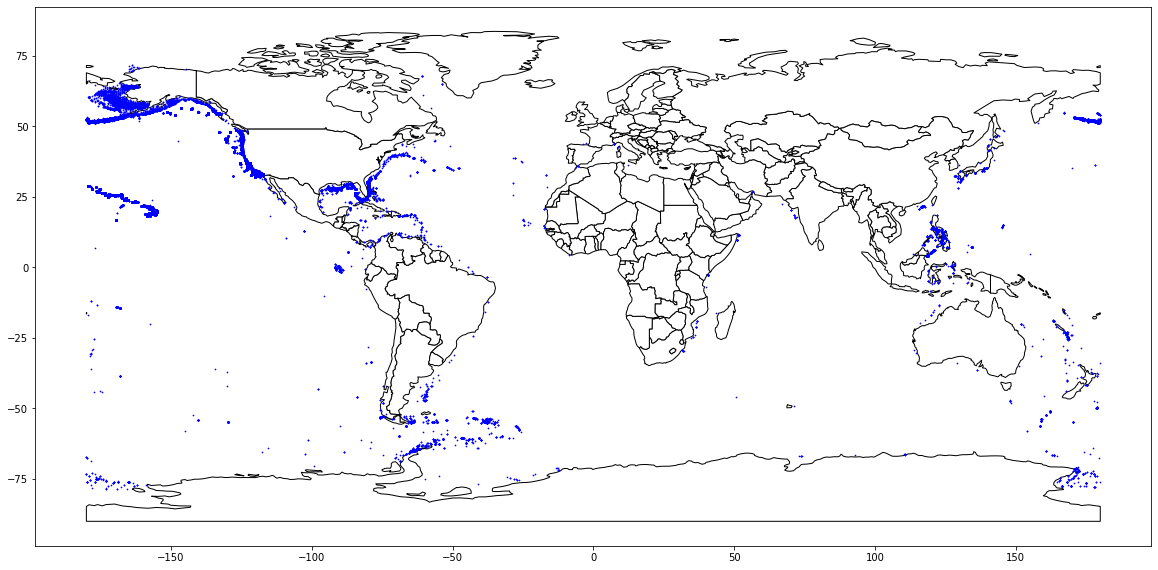

In [13]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', figsize = (20,25))

# creating dataframe for geoplot
coral_data = df_to_gdf(df)

# plotting map
coral_data.plot(ax = base, marker = 'o', color = 'blue', markersize=0.5)

plt.show()

- Observations come from clusters around the world, most notably
    - Southwest of Alaska
    - East/Southeast of the U.S.
    - South of Brasil
    - Southeast of China
    - Southeast of Australia

## What are the major sources of this data?

In [14]:
round(df.data_provider.value_counts() / len(df),2).head(10)

monterey bay aquarium research institute                                                           0.31
noaa, alaska fisheries science center                                                              0.13
hawaii undersea research laboratory                                                                0.13
noaa, olympic coast national marine sanctuary                                                      0.09
noaa, southwest fisheries science center, santa cruz                                               0.09
noaa, office of ocean exploration and research                                                     0.05
temple university                                                                                  0.05
smithsonian institution, national museum of natural history                                        0.03
noaa, deep sea coral research & technology program and office of ocean exploration and research    0.02
harbor branch oceanographic institute                           

- The top 3 providers are
    - Monterey Bay Aquarium Research Institute (31%)
    - NOAA alaska fisheries science center (13%)
    - Hawaii undersea research laboratory (13%)
    

- NOAA has multiple facilities so I'd like to find what percent of observations come from all NOAA's facilities combined

In [16]:
noaa_facil_percent = round(df[df.data_provider.str.contains('noaa')].data_provider.value_counts() / len(df), 2)

print(noaa_facil_percent ,'\n')
print(f'Total % of observations from NOAA: {noaa_facil_percent.sum() * 100}%')

noaa, alaska fisheries science center                                                              0.13
noaa, olympic coast national marine sanctuary                                                      0.09
noaa, southwest fisheries science center, santa cruz                                               0.09
noaa, office of ocean exploration and research                                                     0.05
noaa, deep sea coral research & technology program and office of ocean exploration and research    0.02
noaa, flower garden banks national marine sanctuary                                                0.02
noaa, southwest fisheries science center, la jolla                                                 0.02
noaa, channel islands national marine sanctuary                                                    0.01
noaa, office of response and restoration                                                           0.01
noaa, northwest fisheries science center                        

- Approximately 46% of the data comes from NOAA facilities


### Creating map that reflects different sources of data

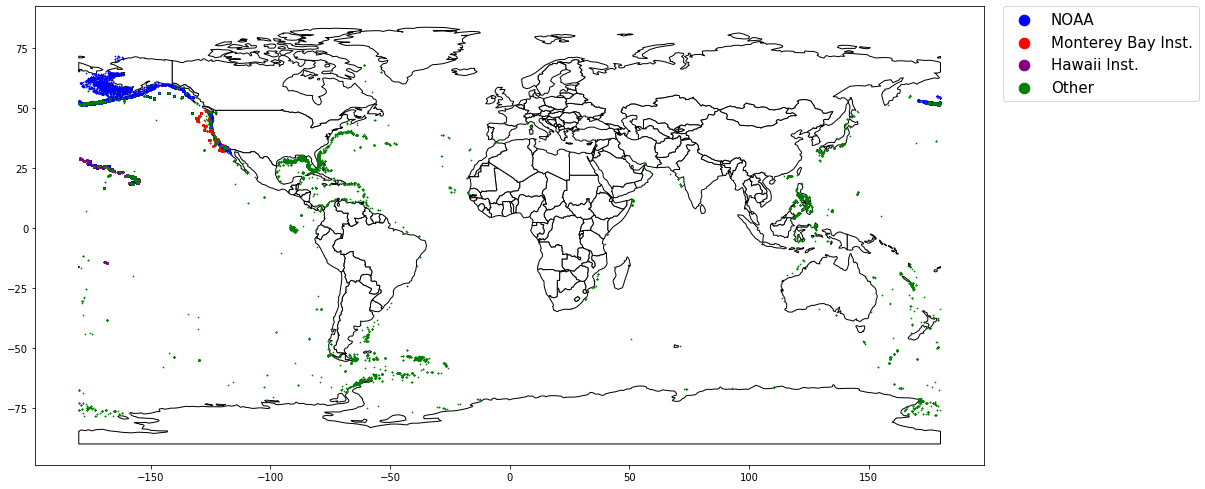

In [18]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', legend = True, figsize = (17, 20))

# separating rows by data provider
noaa_data = df[df.data_provider.str.contains('noaa')]
mbari_data = df[df.data_provider == 'monterey bay aquarium research institute']
hurl_data = df[df.data_provider == 'hawaii undersea research laboratory']
alt_data = df[
    (df.data_provider != 'hawaii undersea research laboratory') & 
    (df.data_provider != 'monterey bay aquarium research institute') &
    (df.data_provider.str.contains('noaa') == False)
             ]

# creating dataframe for geoplot
noaa_data = df_to_gdf(noaa_data)
mbari_data = df_to_gdf(mbari_data)
hurl_data = df_to_gdf(hurl_data)
alt_data = df_to_gdf(alt_data)

# plotting
noaa_data.plot(ax = base, marker = 'o', color = 'blue', markersize=0.5)
mbari_data.plot(ax = base, marker = 'o', color = 'red', markersize=0.5)
hurl_data.plot(ax = base, marker = 'o', color = 'purple', markersize=0.5)
alt_data.plot(ax = base, marker = 'o', color = 'green', markersize=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., labels=['NOAA', 'Monterey Bay Inst.', 'Hawaii Inst.', 'Other'], prop={'size': 15}, markerscale = 15)
plt.show()

- NOAA's observations are all near Alaska
- The Monterey Bay Institute observations are all west of the U.S.
- The Hawaiian Lab's are unsurprisingly, near Hawaii
- The other facilities' observations are scattered around the world, namely
    - East/Southeast of the U.S.
    - Southof Brasil
    - Southeast of China

## What is the range of dates that the observations cover?

In [19]:
first_date = df.observation_date.min()

last_date = df.observation_date.max()

print(f'The dates of the observations range from {first_date} to {last_date}.')

The dates of the observations range from 1868-05-04 00:00:00 to 2016-03-27 00:00:00.


### Creating map that reflects difference in date ranges of observations

In [20]:
df['observation_date']= pd.to_datetime(df['observation_date'])


df[df.observation_date < "1900-01-01"]

,data_provider,scientific_name,vernacular_name_category,taxon_rank,observation_date,latitude,longitude,depth_meters,depth_method,location_accuracy,repository,identification_qualifier,sampling_equipment,record_type,geometry
75,"smithsonian institution, national museum of na...",madrepora oculata,stony coral (branching),species,1888-04-15,-0.4833,-89.9083,717.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id by taxonomic expert,trawl,specimen,POINT (-89.90830 -0.48330)
131,"smithsonian institution, national museum of na...",madrepora oculata,stony coral (branching),species,1888-04-15,-0.4833,-89.9083,717.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id by taxonomic expert,trawl,specimen,POINT (-89.90830 -0.48330)
163,"smithsonian institution, national museum of na...",madrepora oculata,stony coral (branching),species,1891-03-28,-0.9833,-88.975,722.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id by taxonomic expert,trawl,specimen,POINT (-88.97500 -0.98330)
166,"smithsonian institution, national museum of na...",madrepora oculata,stony coral (branching),species,1885-04-01,30.7333,-79.4333,805.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id by taxonomic expert,trawl,specimen,POINT (-79.43330 30.73330)
198,"smithsonian institution, national museum of na...",madrepora oculata,stony coral (branching),species,1884-01-27,15.4111,-63.525,1249.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id by taxonomic expert,trawl,specimen,POINT (-63.52500 15.41110)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405454,"smithsonian institution, national museum of na...",plumarella (dicholaphis) aleutiana,gorgonian coral,species,1893-07-17,56.0333,-169.5,221.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id from sample by taxonomic expert,multiple gears,specimen,POINT (-169.50000 56.03330)
405530,"smithsonian institution, national museum of na...",plumarella (dicholaphis) aleutiana,gorgonian coral,species,1890-08-18,53.675,-167.5,108.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id from sample by taxonomic expert,trawl,specimen,POINT (-167.50000 53.67500)
405674,"smithsonian institution, national museum of na...",plumarella (dicholaphis) echinata,gorgonian coral,species,1893-07-08,52.1,-171.75,518.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id from sample by taxonomic expert,trawl,specimen,POINT (-171.75000 52.10000)
417750,"smithsonian institution, national museum of na...",clavularia sp.,stoloniferan coral,genus,1891-12-06,21.1333,-157.717,642.0,reported,>1000m,"national museum of natural history, smithsonia...",morphological id from sample by taxonomic expert,trawl,specimen,POINT (-157.71700 21.13330)


In [21]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', legend = True, figsize = (17, 20))

# separating rows by data provider
year_prior_1900 = df[df.observation_date < 1900]
year_1900_to_1950 = df[df.data_provider == 'monterey bay aquarium research institute']
year_1950_to_2000  = df[df.data_provider == 'hawaii undersea research laboratory']
year_2001_to_2016 = 

# creating dataframe for geoplot
noaa_data = df_to_gdf(noaa_data)
mbari_data = df_to_gdf(mbaqri_data)
hurl_data = df_to_gdf(hurl_data)
alt_data = df_to_gdf(alt_data)

# plotting
noaa_data.plot(ax = base, marker = 'o', color = 'blue', markersize=0.5)
mbari_data.plot(ax = base, marker = 'o', color = 'red', markersize=0.5)
hurl_data.plot(ax = base, marker = 'o', color = 'purple', markersize=0.5)
alt_data.plot(ax = base, marker = 'o', color = 'green', markersize=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., labels=['NOAA', 'Monterey Bay Inst.', 'Hawaii Inst.', 'Other'], prop={'size': 15}, markerscale = 15)
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-8a2973ff1568>, line 9)

## What are the shallowest and deepest depths within the data?

In [ ]:
least_deep = df.depth_meters.min()
most_deep = df.depth_meters.max()

print(f'The most shallow observation(s) had a depth of {least_deep}, and the deepest observation(s) had a depth of {most_deep}.')

## How many different types of corals are represented in data? (vernacular name)

In [ ]:
vernac_count = df.vernacular_name_category.value_counts()

print(vernac_count,'\n')
print(f'There are {len(vernac_count)} different types of corals in the data.')

## What was the most common type of sampling equipment used?


In [ ]:
equip_count = df.sampling_equipment.value_counts()

print(equip_count,'\n')
print(f'There are {len(equip_count)} different types of equipment in the data.')

## What types of methods were used to qualify the data?

In [ ]:
df.identification_qualifier.value_counts()

- Videos, images, and photos appear to be the most common identification qualifiers
- I'd like to know how much of the data was qualified using these methods

## How much data was qualified using video?

In [ ]:
vids = round(df[df.identification_qualifier.str.contains('video')].identification_qualifier.value_counts() / len(df), 2)

print(vids,'\n')
print(f'Total % of observations qualified by video: {round(vids.sum()*100, 2)}%')

## How much data was qualified using photos or images?

In [ ]:
photos = df[(df.identification_qualifier.str.contains('photo')) | (df.identification_qualifier.str.contains('image'))].identification_qualifier.value_counts() / len(df)
            
print(photos,'\n')
print(f'Total % of observations qualified by photos or images: {round(photos.sum()*100, 2)}%')            

- Videos qualified approximately 68% of observations
- Photos or Images qualified approximately 13% of observations
- Combined, more than 80% of the data was was qualified with either photos, images, or videos